## Data Preparing

In [1]:
import h5py
import numpy as np
import pickle

data = h5py.File('/home/sunji/ANN/glove_200_angular/glove-200-angular.hdf5', 'r')
data_train = np.array(data['train'])
data_test = np.array(data['test'])
with open('/home/sunji/ANN/glove_200_angular/clusters_glove_200_angular.pkl', 'rb') as f:
    clusters = pickle.load(f)
with open('/home/sunji/ANN/glove_200_angular/ground_truth_glove_200_angular_0_4_0_5.pkl', 'rb') as f:
    ground_truth_total = pickle.load(f)

# data = h5py.File('/home/sunji/ANN/fashion_mnist_784_euclidean/fashion-mnist-784-euclidean.hdf5', 'r')
# data_train = np.array(data['train'])
# data_test = np.array(data['test'])
# with open('/home/sunji/ANN/fashion_mnist_784_euclidean/clusters_fashion_mnist_784_euclidean.pkl', 'rb') as f:
#     clusters = pickle.load(f)
# with open('/home/sunji/ANN/fashion_mnist_784_euclidean/ground_truth_fashion_mnist_784_euclidean_0_0_0_5.pkl', 'rb') as f:
#     ground_truth_total = pickle.load(f)
    
# data = h5py.File('/home/sunji/ANN/nytimes_256_angular/nytimes-256-angular.hdf5', 'r')
# data_train = np.array(data['train'])
# data_test = np.array(data['test'])
# with open('/home/sunji/ANN/nytimes_256_angular/clusters_nytimes_256_angular.pkl', 'rb') as f:
#     clusters = pickle.load(f)
# with open('/home/sunji/ANN/nytimes_256_angular/ground_truth_nytimes_256_angular_0_4_0_5.pkl', 'rb') as f:
#     ground_truth_total = pickle.load(f)
    
# data = h5py.File('/home/sunji/ANN/sift_128_euclidean/sift-128-euclidean.hdf5', 'r')
# data_train = np.array(data['train'])
# data_test = np.array(data['test'])
# with open('/home/sunji/ANN/sift_128_euclidean/clusters_sift_128_euclidean.pkl', 'rb') as f:
#     clusters = pickle.load(f)
# with open('/home/sunji/ANN/sift_128_euclidean/ground_truth_sift_128_euclidean_0_0_0_2.pkl', 'rb') as f:
#     ground_truth_total = pickle.load(f)

# data = h5py.File('/home/sunji/ANN/kosarak_jaccard/kosarak-jaccard.hdf5', 'r')
# data_train = np.array(data['train'])
# data_test = np.array(data['test'])
# with open('/home/sunji/ANN/kosarak_jaccard/clusters_kosarak_jaccard.pkl', 'rb') as f:
#     clusters = pickle.load(f)
# with open('/home/sunji/ANN/kosarak_jaccard/ground_truth_kosarak_jaccard_0_9_1_0.pkl', 'rb') as f:
#     ground_truth_total = pickle.load(f)

# data = h5py.File('/home/sunji/ANN/gist_960_euclidean/gist-960-euclidean.hdf5', 'r')
# data_train = np.array(data['train'])
# data_test = np.array(data['test'])
# with open('/home/sunji/ANN/gist_960_euclidean/clusters_gist_960_euclidean.pkl', 'rb') as f:
#     clusters = pickle.load(f)
# with open('/home/sunji/ANN/gist_960_euclidean/ground_truth_gist_960_euclidean_0_0_0_1.pkl', 'rb') as f:
#     ground_truth_total = pickle.load(f)


In [2]:
from numpy import dot
from numpy.linalg import norm
from scipy import spatial

def euclidean_dist_normalized(x1, x2=None, eps=1e-8):
    if np.isnan(x2):
        return 1.0
    left = x1
    right = x2
    return np.sqrt(((left - right) ** 2).mean())

def angular_dist(x1, x2=None, eps=1e-8):
    cosine_sim = 1 - spatial.distance.cosine(x1, x2)
#     print (cosine_sim)
    distance = np.arccos(cosine_sim) / 3.14159267
    return distance

def jaccard(x1, x2=None, eps=1e-8):
    x1 = x1.astype(bool)
    x2 = x2.astype(bool)
    return 1.0 - np.double(np.bitwise_and(x1, x2).sum()) / np.double(np.bitwise_or(x1, x2).sum())


In [3]:
cluster_size = len(clusters)
query_size = 10000
min_threshold = 0.4
max_threshold = 0.5
slot = 0.002
queries_dimension = 200
normalize_factor = 1.0
distance_function = angular_dist
hidden_num = 256
output_num = cluster_size
dataset_name = 'glove_200_angular'

# cluster_size = len(clusters)
# query_size = 10000
# min_threshold = 0.0
# max_threshold = 0.5
# slot = 0.01
# queries_dimension = 784
# normalize_factor = 255.0
# distance_function = euclidean_dist_normalized
# hidden_num = 256
# output_num = cluster_size
# dataset_name = 'fashion_mnist_784_euclidean'

# cluster_size = len(clusters)
# query_size = 10000
# min_threshold = 0.4
# max_threshold = 0.5
# slot = 0.002
# queries_dimension = 256
# normalize_factor = 1.0
# distance_function = angular_dist
# hidden_num = 256
# output_num = cluster_size
# dataset_name = 'nytimes_256_angular'

# cluster_size = len(clusters)
# query_size = 10000
# min_threshold = 0.0
# max_threshold = 0.2
# slot = 0.004
# queries_dimension = 128
# normalize_factor = 218.0
# distance_function = euclidean_dist_normalized
# hidden_num = 256
# output_num = cluster_size
# dataset_name = 'sift_128_euclidean'


# cluster_size = len(clusters)
# query_size = 500
# min_threshold = 0.9
# max_threshold = 1.0
# slot = 0.002
# queries_dimension = 27983
# normalize_factor = 1.0
# distance_function = jaccard
# hidden_num = 256
# output_num = cluster_size
# dataset_name = 'kosarak_jaccard'

# cluster_size = len(clusters)
# query_size = 1000
# min_threshold = 0.0
# max_threshold = 0.1
# slot = 0.001
# queries_dimension = 960
# normalize_factor = 1.0
# distance_function = euclidean_dist_normalized
# hidden_num = 256
# output_num = cluster_size
# dataset_name = 'gist_960_euclidean'

In [4]:
ground_truth_total_level = [[[] for _ in range(query_size)] for _ in range(cluster_size)]
for clus in range(cluster_size):
    for t in ground_truth_total[clus]:
        ground_truth_total_level[t[0]][t[1]].append(t)

In [5]:
centroids = []
for cluster in clusters:
    centroids.append(np.mean(cluster))

In [6]:
from numpy import dot
from numpy.linalg import norm
from scipy import spatial

test_features = []
test_thresholds = []
test_distances = []
test_targets = []
test_cards = []

for query_id in range(int(query_size * 0.8),query_size):
    cardinality = [0 for _ in range(cluster_size)]
    distances2centroids = []
    for cc in centroids:
        distances2centroids.append(distance_function(data_test[query_id], cc))
    for threshold_id, threshold in enumerate(np.arange(min_threshold, max_threshold, slot)):
        indicator = []
        cards = []
        for cluster_id in range(cluster_size):
            cardinality[cluster_id] += ground_truth_total_level[cluster_id][query_id][threshold_id][-1]
            if cardinality[cluster_id] > 0:
                indicator.append(1)
            else:
                indicator.append(0)
            cards.append(cardinality[cluster_id])
        feature = data_test[query_id].astype(float) / normalize_factor
        test_features.append(feature)
        test_distances.append(distances2centroids)
        test_thresholds.append([threshold+slot])
        test_targets.append(indicator)
        test_cards.append(cards)

In [7]:
import torch
import torch.utils.data
batch_size = 128
test_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(torch.FloatTensor(test_features), torch.FloatTensor(test_thresholds), torch.FloatTensor(test_distances), torch.FloatTensor(test_targets), torch.FloatTensor(test_cards)), batch_size=batch_size, shuffle=False)


## Global

In [8]:
from __future__ import print_function
import argparse
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

input_dimension = queries_dimension
cluster_dimension = cluster_size

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.nn1 = nn.Linear(input_dimension, hidden_num)
        self.nn2 = nn.Linear(hidden_num, hidden_num)
#         self.nn3 = nn.Linear(hidden_num, hidden_num)
        
        self.dist1 = nn.Linear(cluster_dimension, hidden_num)
        self.dist2 = nn.Linear(hidden_num, hidden_num)
        
        self.nn4 = nn.Linear(hidden_num, hidden_num)
        self.nn5 = nn.Linear(hidden_num, output_num)
        
        self.thres1 = nn.Linear(1, hidden_num)
        self.thres2 = nn.Linear(hidden_num, 1)

    def forward(self, x, distances, thresholds):
        out1 = F.relu(self.nn1(x))
        out2 = F.relu(self.nn2(out1))
#         out3 = F.relu(self.nn3(out2))
#         print (distances.shape)
        distance1 = F.relu(self.dist1(distances))
        distance2 = F.relu(self.dist2(distance1))
        
        thresholds_1 = F.relu(self.thres1(thresholds))
        thresholds_2 = self.thres2(thresholds_1)

        out4 = F.relu(self.nn4((out2 + distance2) / 2))
        out5 = self.nn5(out2)
        
        probability = F.sigmoid(out5 + thresholds_2)
        return probability

def loss_fn(estimates, targets, cards):
    punish_idx = (estimates < 0.5).float()
    return F.mse_loss(estimates, targets) + 0.02 * torch.log(((0.5 - estimates) * cards * punish_idx).mean() + 1.0)

def print_loss(estimates, targets, cards):
    true_positive = 0.0
    true_negative = 0.0
    false_positive = 0.0
    false_negative = 0.0
    num_elements = estimates.shape[1]
    for est, tar in zip(estimates, targets):
        for i in range(num_elements):
            if est[i] < 0.5 and tar[i] == 0:
                true_negative += 1
            elif est[i] < 0.5 and tar[i] == 1:
                false_negative += 1
            elif est[i] >= 0.5 and tar[i] == 0:
                false_positive += 1
            else:
                true_positive += 1
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    total_card = cards.sum(dim=1)
#     print ('total_card: ', total_card.shape)
    miss_card = torch.FloatTensor([cards[i][((estimates[i] < 0.5).nonzero())].sum() for i in range(cards.shape[0])])
#     print ('miss_card: ', miss_card.shape)
    miss_rate = (miss_card / (total_card + 0.1)).mean()
    return precision, recall, miss_rate

In [ ]:
model = Model()
model.load_state_dict(torch.load('/home/sunji/ANN/'+ dataset_name +'/saved_models/global_'+dataset_name+'_punish_query_threshold_monotonic.model'))
model.eval()
num_selected = []
for batch_idx, (features, thresholds, distances, targets, cards) in enumerate(test_loader):
    if batch_idx % 100 == 0:
        print (batch_idx)
    estimates = model(features, distances, thresholds)
    global_indicator = (estimates >= 0.5).float().sum(dim=1)
    for n in global_indicator:
        num_selected.append(n.item())
        

In [ ]:
print (np.mean(num_selected), np.median(num_selected), np.percentile(num_selected, 10), np.percentile(num_selected, 30), np.percentile(num_selected, 40), np.percentile(num_selected, 90))

## Local

In [9]:
from __future__ import print_function
import argparse
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

hidden_num_2 = 128

class Threshold_Model(nn.Module):
    
    def __init__(self):
        super(Threshold_Model, self).__init__()
        self.fc1 = nn.Linear(1, hidden_num_2)
        self.fc2 = nn.Linear(hidden_num_2, 1)
    
    def forward(self, threshold):
        t1 = F.relu(self.fc1(threshold))
        t2 = self.fc2(t1)
        return t2

class CNN_Model(nn.Module):
    
    def __init__(self, in_channel, out_channel, kernel_size, stride, padding, pool_type, pool_size):
        super(CNN_Model, self).__init__()
        if pool_type == 0:
            pool_layer = nn.MaxPool1d(kernel_size=pool_size, stride=pool_size)
        elif pool_type == 1:
            pool_layer = nn.AvgPool1d(kernel_size=pool_size, stride=pool_size)
        else:
            print ('CNN_Model Init Error, invalid pool_type {}'.format(pool_type))
            return
        self.layer = nn.Sequential(
            nn.Conv1d(in_channel, out_channel, kernel_size=kernel_size, stride=stride, padding=padding), 
            nn.BatchNorm1d(out_channel),
            nn.ReLU(),
            pool_layer)
        
    def forward(self, inputs):
        hid = self.layer(inputs)
        return hid

class Output_Model(nn.Module):
    
    def __init__(self, inputs_dim):
        super(Output_Model, self).__init__()
        self.fc1 = nn.Linear(inputs_dim, hidden_num_2)
        self.fc2 = nn.Linear(hidden_num_2, 1)
        
    def forward(self, queries, threshold):
        out1 = F.relu(self.fc1(queries))
        out2 = out1 + threshold
        out3 = self.fc2(out2)
        return out3

# class Model(nn.Module):
    
#     def __init__(self):
#         super(Model, self).__init__()
#         self.nn1 = nn.Linear(queries_dimension+1, hidden_num)
#         self.n1 = nn.Linear(hidden_num, hidden_num)
#         self.n2 = nn.Linear(hidden_num, hidden_num)
# #         self.n3 = nn.Linear(hidden_num, hidden_num)
# #         self.n4 = nn.Linear(hidden_num, hidden_num)
#         self.nn2 = nn.Linear(hidden_num, 1)
        
#     def forward(self, queries, threshold):
#         out1 = F.relu(self.nn1(torch.cat([queries, threshold],1)))
#         hid = out1
#         hid = F.relu(self.n1(hid))
#         hid = F.relu(self.n2(hid))
# #         hid = F.relu(self.n3(hid))
# #         hid = F.relu(self.n4(hid))
# #         hid = self.norm2(hid)
#         out2 = self.nn2(hid)
#         return out2

def loss_fn(estimates, targets, mini, maxi):
    est = unnormalize(estimates, mini, maxi)
    print (torch.cat((est, targets), 1))
    return F.mse_loss(est, targets)

def l1_loss(estimates, targets, eps=1e-5):
    return F.smooth_l1_loss(estimates, torch.log(targets))

def mse_loss(estimates, targets, eps=1e-5):
    return F.mse_loss(estimates, torch.log(targets))

def qerror_loss(preds, targets, mini, maxi):
    qerror = []
    preds = unnormal1ize_label(preds, mini, maxi)
    for i in range(len(targets)):
        if (preds[i] > targets[i]).cpu().data.numpy()[0]:
            qerror.append(preds[i]/targets[i])
        else:
            qerror.append(targets[i]/(preds[i] + 0.1))
    return torch.mean(torch.cat(qerror) ** 2)

def print_loss(estimates, targets):
    esti = torch.exp(estimates)
    qerror = []
    for i in range(esti.shape[0]):
        if esti[i] > targets[i] + 0.1:
            qerror.append((esti[i] / (targets[i] + 0.1)).item())
        else:
            qerror.append(((targets[i] + 0.1) / esti[i]).item())
    
    return F.mse_loss(esti, targets), np.mean(qerror), np.max(qerror)

In [10]:
class TunableParameters():
    
    def __init__(self, out_channel, kernel_size, stride, padding, pool_size, pool_type):
        self.out_channel = out_channel
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.pool_size = pool_size
        self.pool_type = pool_type
        
    def __repr__(self):
        return str(self.out_channel) +' '+ str(self.kernel_size) +' '+ str(self.stride) +' '+ str(self.padding) +' '+ str(self.pool_size) +' '+ str(self.pool_type)
 
    def __str__(self):
        return str(self.out_channel) +' '+ str(self.kernel_size) +' '+ str(self.stride) +' '+ str(self.padding) +' '+ str(self.pool_size) +' '+ str(self.pool_type)

In [11]:
import pickle
hyper_parameterss = []
with open('/home/sunji/ANN/'+dataset_name+'/saved_models/cnn_hyper_parameters.hyperpara', 'r') as handle:
    for paras in handle.readlines():
        hyper_parameters = []
        for para in paras.split(';'):
            para = para.split(' ')
            hyper_parameters.append(TunableParameters(int(para[0]), int(para[1]), int(para[2]),
                                                      int(para[3]), int(para[4]), int(para[5])))
        hyper_parameterss.append(hyper_parameters)
            

In [12]:
cnn_modelss = []
threshold_models = []
output_models = []
for idx in range(cluster_size):
    states = torch.load('/home/sunji/ANN/'+dataset_name+'/saved_models/local_'+dataset_name+'_cluster_' + str(idx) + '.model')
    hyper_para = hyper_parameterss[idx]
    cnn_models = []
    weights = [None for _ in range(len(hyper_para))]
    for key, value in states.items():
        if key != 'threshold_model_state_dict' and key != 'output_model_state_dict':
#             print (key)
            layer_id = int(key.split('_')[-1])
#             print (layer_id)
            weights[layer_id] = value
    in_channel = 1
    in_size = queries_dimension
    for weight_idx, weight in enumerate(weights):
        hyper = hyper_para[weight_idx]
        cnn_model = CNN_Model(in_channel, hyper.out_channel, hyper.kernel_size,
                              hyper.stride, hyper.padding, hyper.pool_type, hyper.pool_size)
        in_size = int((int((in_size - hyper.kernel_size + 2*(hyper.padding)) / hyper.stride) + 1) / hyper.pool_size)
        in_channel = hyper.out_channel
        cnn_model.load_state_dict(weight)
        cnn_model.eval()
        cnn_models.append(cnn_model)
    cnn_modelss.append(cnn_models)
        
    threshold_model_state_dict = states['threshold_model_state_dict']
    threshold_model = Threshold_Model()
    threshold_model.load_state_dict(threshold_model_state_dict)
    threshold_model.eval()
    threshold_models.append(threshold_model)
    
    output_model_state_dict = states['output_model_state_dict']
    output_model = Output_Model(in_size * in_channel)
    output_model.load_state_dict(output_model_state_dict)
    output_model.eval()
    output_models.append(output_model)
    

In [ ]:
len(output_models)

In [ ]:
estimatess = []
for idx in range(100):
    estimates = only_test(cnn_modelss[idx], threshold_models[idx], output_models[idx], test[idx])
    estimatess.append(estimates)

In [ ]:
len(estimatess[3])

## End-to-End Testing

In [13]:
def get_local_cardinality(cnn_models, threshold_model, output_model, queries, thresholds):
    queries = queries.unsqueeze(2).permute(0,2,1)
    for model in cnn_models:
        queries = model(queries)
    threshold = threshold_model(thresholds)
    queries = queries.view(queries.shape[0], -1)
    estimates = output_model(queries, threshold)
    esti = torch.exp(estimates)
    return esti.detach()

In [14]:
def print_qerror(estimates, targets):
    qerror = []
    for i in range(estimates.shape[0]):
        left = estimates[i] + 1
        right = targets[i] + 1
        if left > right:
            qerror.append((left / right).item())
        else:
            qerror.append((right / left).item())
    return qerror

In [ ]:

for cluster_id in range(cluster_size):
    print (cluster_id)
    total = 0.0
    for batch_idx, (features, thresholds, distances, targets, cards) in enumerate(test_loader):
        estimates = get_local_cardinality(cnn_modelss[cluster_id], threshold_models[cluster_id],
                                             output_models[cluster_id], features, thresholds)
#         print (estimates.shape, cards[:,cluster_id].shape)
        print (torch.cat((estimates, cards[:,cluster_id].unsqueeze(1)), axis=1))
        errors = print_qerror(estimates, cards[:,cluster_id])
        total += np.mean(errors)
        print (np.mean(errors))
    print (total / len(test_loader))

In [19]:
import time

model = Model()
model.load_state_dict(torch.load('/home/sunji/ANN/'+dataset_name+'/saved_models/global_'+dataset_name+'_punish_query_threshold_monotonic.model'))
model.eval()
test_loss = 0.0
precision = 0.0
recall = 0.0
miss_rate = 0.0
estimatesss = []
q_errors = []
start = time.time()
for batch_idx, (features, thresholds, distances, targets, cards) in enumerate(test_loader):
    if batch_idx % 100 == 0:
        print (batch_idx)
    current_batch_size = len(features)
    estimates = model(features, distances, thresholds)
    global_indicator = (estimates >= 0.5).float()
    local_estimates = []
    nnn = 75
    for cluster_id in range(nnn):
        local_estimates.append(get_local_cardinality(cnn_modelss[cluster_id], threshold_models[cluster_id],
                                                     output_models[cluster_id], features, thresholds))
    for cluster_id in range(nnn, cluster_size):
        local_estimates.append(torch.FloatTensor([[0.0] for _ in range(current_batch_size)]))
        
#     nnn = 25
#     for cluster_id in range(nnn):
#         get_local_cardinality(cnn_modelss[cluster_id], threshold_models[cluster_id],
#                               output_models[cluster_id], features, thresholds)
        
    localss = torch.cat(local_estimates, dim = 1)
#     print (localss.shape, global_indicator.shape)
    cards_estimates = (localss * global_indicator).sum(dim=1).unsqueeze(1)
    cards = cards.sum(dim=1).unsqueeze(1)
#     print (cards_estimates.shape)
#     print (cards.shape)
#     print (torch.cat((cards_estimates, cards), dim=1))
    q_errors += print_qerror(cards_estimates, cards)
#     print (q_errors)
end = time.time()
mean = np.mean(q_errors)
percent90 = np.percentile(q_errors, 90)
percent95 = np.percentile(q_errors, 95)
percent99 = np.percentile(q_errors, 99)
median = np.median(q_errors)
maxi = np.max(q_errors)
print ('Testing: Mean Error {}, Median Error {}, 90 Percent {}, 95 Percent {}, 99 Percent {}, Max Percent {}, Latency {}'
       .format(mean, median, percent90, percent95, percent99, maxi, (end - start) / len(q_errors)))
    
    
        
    

0
100
200
300
400
500
600
700
Testing: Mean Error 2.4616352361285685, Median Error 2.1729655265808105, 90 Percent 4.070184135437012, 95 Percent 4.747965574264526, 99 Percent 6.284128694534301, Max Percent 47.23072814941406, Latency 0.0006790991187095642


In [106]:
cluster_size

100

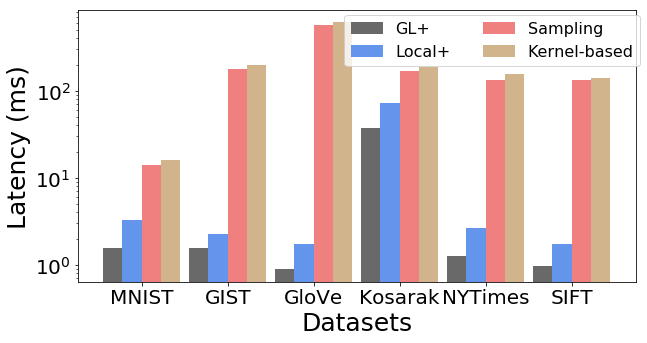

In [28]:
glove = [0.887, 1.754, 570, 610]
gist = [1.56, 2.28, 178, 198]
kosarak = [37.6, 72.5, 169, 188]
nytimes = [1.26, 2.67, 133, 154]
mnist = [1.56, 3.31, 14, 16]
sift = [0.96, 1.76, 133, 141]

import matplotlib.pyplot as plt
import numpy as np
 
name_list = ['MNIST','GIST','GloVe','Kosarak','NYTimes', 'SIFT']
num_list = [mnist[0], gist[0], glove[0], kosarak[0], nytimes[0], sift[0]]
num_list1 = [mnist[1], gist[1], glove[1], kosarak[1], nytimes[1], sift[1]]
num_list2 = [mnist[2], gist[2], glove[2], kosarak[2], nytimes[2], sift[2]]
num_list3 = [mnist[3], gist[3], glove[3], kosarak[3], nytimes[3], sift[3]]
# num_list3 = [mnist['glcnn'], gist['glcnn'], glove['glcnn'], kosarak['glcnn'], nytimes['glcnn'], sift['glcnn']]
# num_list4 = [mnist['gl+'], gist['gl+'], glove['gl+'], kosarak['gl+'], nytimes['gl+'], sift['gl+']]
# num_list5 = [mnist['mlp'], gist['mlp'], glove['mlp'], kosarak['mlp'], nytimes['mlp'], sift['mlp']]
x=np.array(range(len(name_list)))
fig = plt.figure(figsize=(10.0, 5.0))
# plt.ylim(0,2000)

_ = plt.xticks(x,name_list)
# plt.xticks(name_list)
# for i in range(len(x)):
#     x[i] = x[i] + width/2
total_width, n = 0.9, 4
width = total_width / n
x = x - (total_width - width) / 2
plt.bar(x, num_list, width=width, label='GL+',fc = 'dimgrey')
plt.bar(x + width, num_list1, width=width, label='Local+',fc = 'cornflowerblue')
plt.bar(x + width * 2, num_list2, width=width, label='Sampling',fc = 'lightcoral')
plt.bar(x + width * 3, num_list3, width=width, label='Kernel-based',fc = 'tan')
# plt.bar(x + width * 4, num_list4, width=width, label='GL+',fc = 'plum')

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Datasets', fontsize=25)
plt.ylabel('Latency (ms)', fontsize=25)
plt.yscale('log')

plt.legend(fontsize = 16, ncol=2, loc='upper right', bbox_to_anchor=(1.022,1.01))
plt.savefig('select_latency.eps', format='eps', bbox_inches='tight')


In [2]:
partitions_num = [25, 50, 75, 100, 125, 150, 175, 200]
latency_1 = [0.000299, 0.000475, 0.0006790991187095642, 0.000887, 0.00102, 0.00124, 0.00142, 0.00165]
latency_2 = [0.000444, 0.00156, 0.00238, 0.00385, 0.00418, 0.00527, 0.00616, 0.00705]
latency_3 = [0.000416, 0.000645, 0.000914, 0.00126, 0.00162, 0.00183, 0.00207, 0.00244]
latency_4 = [0.000295, 0.000457, 0.000641, 0.000960, 0.00121, 0.00143, 0.00171, 0.00195]
latency_5 = [0.0175, 0.0376,0.0553,0.0731,0.0978,0.113,0.131, 0.143]
latency_6 = [0.000467, 0.000724, 0.000918, 0.00156, 0.00171, 0.00189,0.00203, 0.00221]
sampling = {'GloVe': [0.57 for _ in range(6)], 'MNIST': [0.014 for _ in range(6)], 'NYTimes': [0.133 for _ in range(6)],
            'SIFT': [0.133 for _ in range(6)], 'Kosarak': [0.169 for _ in range(6)], 'GIST': [0.178 for _ in range(6)]}


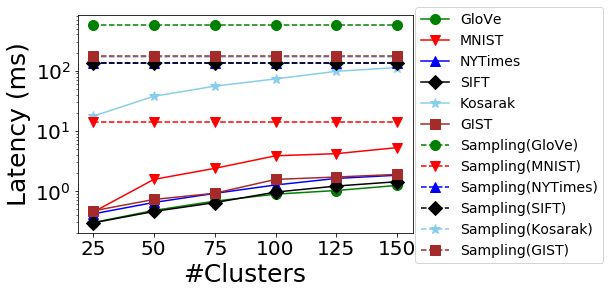

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x_axix = [25, 50, 75, 100, 125, 150]
# plt.title('Global Selection (Precision)', fontsize=20)
plt.yscale('log')
plt.xticks(x_axix)
plt.plot(x_axix, np.array(latency_1[:6]) * 1000, color='green', label='GloVe', marker='o', markersize=10)
plt.plot(x_axix, np.array(latency_2[:6]) * 1000, color='red', label='MNIST', marker='v', markersize=10)
plt.plot(x_axix, np.array(latency_3[:6]) * 1000, color='blue', label='NYTimes', marker='^', markersize=10)
plt.plot(x_axix, np.array(latency_4[:6]) * 1000, color='black', label='SIFT', marker='D', markersize=10)
plt.plot(x_axix, np.array(latency_5[:6]) * 1000, color='skyblue', label='Kosarak', marker='*', markersize=10)
plt.plot(x_axix, np.array(latency_6[:6]) * 1000, color='brown', label='GIST', marker='s', markersize=10)

plt.plot(x_axix, np.array(sampling['GloVe']) * 1000, color='green', label='Sampling(GloVe)', linestyle='dashed', marker='o', markersize=10)
plt.plot(x_axix, np.array(sampling['MNIST']) * 1000, color='red', label='Sampling(MNIST)', linestyle='dashed', marker='v', markersize=10)
plt.plot(x_axix, np.array(sampling['NYTimes']) * 1000, color='blue', label='Sampling(NYTimes)', linestyle='dashed', marker='^', markersize=10)
plt.plot(x_axix, np.array(sampling['SIFT']) * 1000, color='black', label='Sampling(SIFT)', linestyle='dashed', marker='D', markersize=10)
plt.plot(x_axix, np.array(sampling['Kosarak']) * 1000, color='skyblue', label='Sampling(Kosarak)', linestyle='dashed', marker='*', markersize=10)
plt.plot(x_axix, np.array(sampling['GIST']) * 1000, color='brown', label='Sampling(GIST)', linestyle='dashed', marker='s', markersize=10)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=14, ncol=1, loc='right', bbox_to_anchor=(1.57,0.45),borderaxespad = 0.) # 显示图例
plt.xlabel('#Clusters', fontsize=25)
plt.ylabel('Latency (ms)', fontsize=25)
plt.savefig('partitions_latency.eps', format='eps', bbox_inches='tight')


In [4]:
partitions_num = [1, 25, 50, 75, 100, 125, 150, 175, 200]
glove = [1.87, 1.55, 1.32, 1.23, 1.20, 1.19, 1.17, 1.15, 1.14]
mnist = [2.60, 1.55, 1.28, 1.25, 1.23, 1.22, 1.21, 1.20, 1.20]
nytimes = [101, 36.3, 15.1, 3.13, 1.01, 1.01, 1.01, 1.00, 1.00]
sift = [3.04, 2.13, 1.86, 1.63, 1.55, 1.52, 1.51, 1.50, 1.49]
kosarak = [3.65, 2.61, 2.27, 2.24, 2.22, 2.21, 2.20, 2.19, 2.19]
gist = [56.7, 12.5, 7.28, 4.12, 3.26, 3.23, 3.21, 3.20, 3.20]

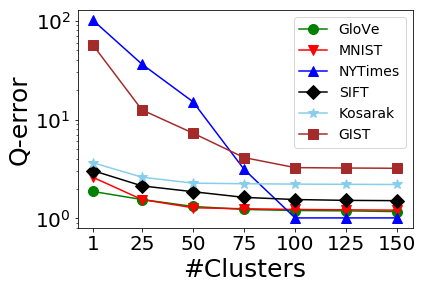

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x_axix = [1, 25, 50, 75, 100, 125, 150]
# plt.title('Global Selection (Precision)', fontsize=20)
plt.yscale('log')
plt.xticks(x_axix)
plt.plot(x_axix, np.array(glove[0:7]), color='green', label='GloVe', marker='o', markersize=10)
plt.plot(x_axix, np.array(mnist[0:7]), color='red', label='MNIST', marker='v', markersize=10)
plt.plot(x_axix, np.array(nytimes[0:7]), color='blue', label='NYTimes', marker='^', markersize=10)
plt.plot(x_axix, np.array(sift[0:7]), color='black', label='SIFT', marker='D', markersize=10)
plt.plot(x_axix, np.array(kosarak[0:7]), color='skyblue', label='Kosarak', marker='*', markersize=10)
plt.plot(x_axix, np.array(gist[0:7]), color='brown', label='GIST', marker='s', markersize=10)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=14, ncol=1, loc='upper right') # 显示图例
plt.xlabel('#Clusters', fontsize=25)
plt.ylabel('Q-error', fontsize=25)
plt.savefig('partitions_error.eps', format='eps', bbox_inches='tight')
plt.show()